In [87]:
''' Are you using Google Colab? '''

''' To have access to your files in drive use this lines of code at the top of your notebook


from google.colab import drive
drive.mount('/content/drive')

'''

" To have access to your files in drive use this lines of code at the top of your notebook\n\n\nfrom google.colab import drive\ndrive.mount('/content/drive')\n\n"

# Python Workshop for Physics Students by SPS!

## Today is: 10/27/2023

## Schedule:

- Every friday from 1:30 P.M. to 3:30 P.M.


## Instructors:
- Aldo
- Tadeo
- Byron J. Encinas Velázquez

## What we'll learn today
- [ ] Euler Integration using loops
- [ ] Reading from files

We'll also work on some problems utilizing the tools we have learned about so far, plotting some graphs based on text files and writing the results to our own text files!



## We highly encourage you to try some of this concepts in your machine while we are discussing and explaining them</font>

In [88]:
# importing section

import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.animation as animation
import matplotlib as mpl

### Solving for Simple Pendulum Motion



Let's picture a physical phenomena such as that we cannot get the analytical solution easily and in which the primary way to solve is to approximate the algebra into something not exactly like the reality but mathematically solvable.

The Pendulum Motion arrives as one of this problems.

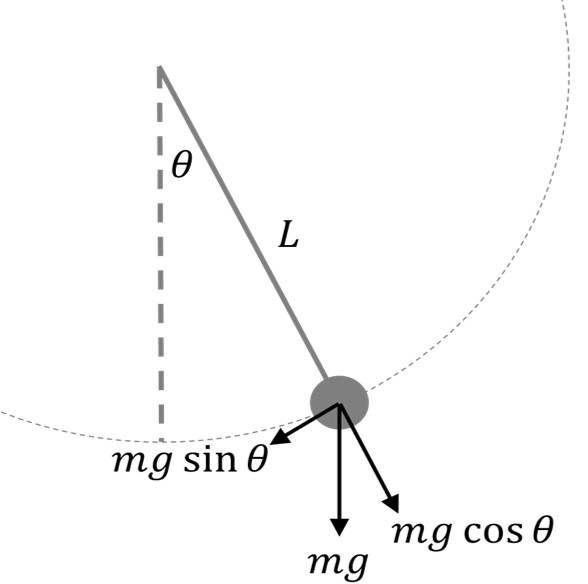

Then the force on the mass which is hanging on the pendulum is the one that is perpendicular with the length of the rope and is always opposite in sign to the angular position $θ

  $$ m a = -mg \sin(θ)$$

  where the tangential acceleration is $a = l \ddot{\theta}$

  so...

  
  $$ \ddot{\theta} = -\frac{g}{l} \sin(θ)$$

which is the non-linear equation we want to solve.

The way to solve this is using an iterative method called Euler Method which goes like this.

We start at some initial time

$$
t_0 = initial \ time \\
\omega_0 = initial \ angular \ velocity \\
\theta_0 = initial \ angular \ position
$$

such that we can obtain a first value of the angular velocity by pluging in:

$$ \omega_{1} = -\frac{g}{l} \sin(θ_0)\Delta t + \omega_0$$

using this result to obtain the first step angular position. In this case that it's just $ \omega_1  \Delta t =  \theta_1$

So, each step we are going to find the angular velocity and angular position.

So each step we are calculating:

$$ \omega_{n+1} = -\frac{g}{l} \sin(θ_n)\Delta t + \omega_n$$
$$ \theta_{n+1} = \omega_{n+1} \Delta t + \theta_n$$


In [100]:
def temp_rate(temp, ambient_temp, heat_coeff, surface_area):
  return -(heat_coeff * surface_area)*(temp - ambient_temp)


8713.5

In [89]:
import math

# this gets acceleration on the pendulum for specific position
def ang_acc(ang_pos):
  l = 10
  return -9.81*math.sin(ang_pos)/l

This is a second order diferential equation, doesn't matter if that doesn't ring a bell right know. What matters is that you can solve it or at least know that it can be solved.

In [96]:
starting_interval = 1000
snapshots = np.linspace(1,starting_interval,starting_interval)
# initial conditions
ang_vel_init = 0            # initial angular velocity
ang_pos_init = math.pi/6.0    # initial angular position

ang_vel = [ang_vel_init]    # angular velocity
ang_pos = [ang_pos_init]    # angular position

# this is the width of timestep
delta = snapshots[1] - snapshots[0]

In [91]:
# Euler Method

xpos = []
ypos = []

for i, times in enumerate(snapshots):

  ang_vel_new = ang_acc(ang_pos[i])*delta + ang_vel[i-1]
  ang_pos_new = ang_vel[i]*delta + ang_pos[i-1]

  ang_vel.append(ang_vel_new)
  ang_pos.append(ang_pos_new)

  x.append(np.sin(ang_pos_new))
  y.append(np.cos(ang_pos_new))

In [92]:
len(x) == len(snapshots)

True

In [94]:
''' import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.scatter(snapshots, ang_pos, label='linear')

ax.set_title("Pendulum Motion")
ax.legend(["Linear"])  # Add a legend. '''

' import matplotlib.pyplot as plt\n\nfig, ax = plt.subplots(figsize=(5, 5), layout=\'constrained\')\n\nax.set_xlabel(\'$x$\')\nax.set_ylabel(\'$y$\')\n\nax.scatter(snapshots, ang_pos, label=\'linear\')\n\nax.set_title("Pendulum Motion")\nax.legend(["Linear"])  # Add a legend. '

##Reading from text files
We have learned how to write to files previously but we never touched on how to read them. So lets go over that now.

###Python's reading methods
There are multiple ways that python allows us to retrieve information from a file once we have opened it:

**.seek()**: Moves the file reading pointer to the specified index.

**.tell()**: Returns what index is the file reading pointer at

**.read()**: Returns the specified amount of bytes from the file in the form of a string. The default value is -1 so it is usually used to retrieve **all** of the data in a file.

**.readline()**: Similarly to .read() it returns the specified amount of bytes from the next line in the file in the form of a string, it then moves the filereader pointer to the next character. This means that we have to keep track of where in the file the filereader pointer is when we use this method.

**.readlines()**: Returns a list of the lines in the file in the form of strings. We are able to specify the max amount of bytes we are willing to retrieve but by default we retrieve all lines.

Imagine we have a text file "TheMeaningOfLife.tx" with the contents:



> "The cow named Moorie, The cow named Moorie
>
> She’s very round, And she says: “Hola”
>
> The cow named Moorie, The cow named Moorie
>
> She’s got a degree, And she goes moo
>
> And she goes moo, And she goes moo"


In [ ]:
file = open("/content/drive/MyDrive/Python Workshop SPS/TheMeaningOfLife.txt", "w")

# we first open our file

# our pointer starts at the beggining of our file

print(file.read()) # Prints whole file, moves pointer to end of file

file.seek(0) # Moves pointer to the start of the file

print(file.readline()) # -> The cow named Moorie, The cow named Moorie

print(file.readline()) # -> She’s very round, And she says: “Hola”

print(file.tell()) # Prints the index of the pointer -> 82

file.seek(0)

#We can also iterate through the file itself

for line in file:
  print(line)

file.close()

###Comma separated values

It is common for text files to be formatted in csv form, in these cases we can use the .split(x) function to convert a string into a list with only the values between instances of "x"

> "1,0,4,5,0".split(",") ---> [1 0 4 5 0]



##Lets try to write some code!
## Newton's Law of Cooling
Newton's law of Cooling can tell us how quickly an object will cool down if placed in an enviroment with a lower temperature based on its heat transfer coefficient and its surface area, we can use the following first order differential equation:

$$ Q = h * A *(T(t) - Te)$$

.

$$
Q	=	rate \ of \ heat \ transfer \ out \ of \ the \ body \\
\ h	=	heat \ transfer \ coefficient \\
\ A	=	heat \ transfer \ surface \ area \\
\ T	=	temperature \ of \ the \ object's \ surface \\
\ Te	=	temperature \ of \ the \ environment \\
\ T(t)	=	time-dependent \ temperature
$$

###Solving the cooling problem
Based on what we know about utilizing the euler method to solve differential equations write a program that calculates the temperature of a cooling body through time and store the results in a list.

Once you are done try out modifying your code to also store the rate of change in another list.

###Plot it
Now that your code can solve the cooling problem try to plot both the temperature and its rate of change, remember to include lables.

###Using a text file
Modify your code so that your initial conditions come from a textfile called start.txt and the temperature of the enviroment for every step changes according to another textfile called temperatures.txt.

- Can you modify your code to take the initial conditions from direct user input?
- What about writing your temperature list and your rate of change list to a text file?




